In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimension du dataset (100, 2)
dimension de la sortie Y (100, 1)


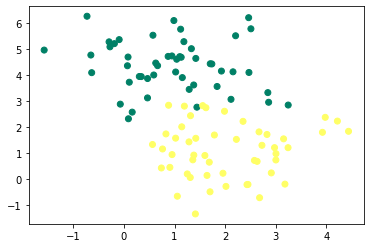

In [103]:
#j utilise le dtaset de sklearn make blobs , on prend 100 donnee de 2 features et on reajuste la dimension de la sortie Ys(target)

dataset, Ys= make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
Ys=Ys.reshape((Ys.shape[0],1))
print('dimension du dataset',dataset.shape)
print('dimension de la sortie Y',Ys.shape)
plt.scatter(X[:,0],X[:,1],c=Ys,cmap='summer')
plt.show()



In [104]:
#je génère de maniere random des parametres w et b de notre fonction Z
def generation_params(dataset):
    W=np.random.randn(dataset.shape[1],1)
    b=np.random.randn(1)
    return (W,b)

In [105]:
#la fonction segmoid
def segmoid(Z):
    return 1/(1+np.exp(-Z))

In [106]:
#je genère le modèle notament la fonction Z et la fonction d activation segmoid(-Z)
def perceptron(dataset, W, b):
    Z= dataset.dot(W)+b
    A= segmoid(Z)
    return (Z,A)

In [107]:
#fonction de cout pour calculer l'erreur entre les sorties réeles (target Ys)et la sortie prédie par le modele par la fonction d activation les A(sortie de prediction)
def log_loss(A,Ys):
    return 1/len(Ys)*np.sum(-Ys*np.log(A)-(1-Ys)*np.log(1-A))

In [108]:
#calcul des gradients dLW represente le jackobien donc la dérivé de logloss on utilise la transposé du dataset
def gradients(A,dataset,Ys):
    dLW=1/len(Ys)*np.dot(dataset.T,A-Ys)
    dLb=1/len(Ys)*np.sum(A-Ys)
    return (dLW,dLb)

In [109]:
#l etape de learn , c est l iteration pour mettre a jour les gradients
def learn_params(dLW,dLb,W,b,learning_rate):
    W=W-learning_rate*dLW
    b=b-learning_rate*dLb
    return(W,b)

In [110]:
def prediction(dataset,W,b,seuil=0.5):
    Z,A=perceptron(dataset,W,b)
    return A>=seuil,A

In [111]:
from sklearn.metrics import accuracy_score
#accuracy score est une metric de mesure d exactitude

In [112]:
#c est la partie qui fait l apprentissage de notre perceptron 
def learn_perceptron(dataset,Ys,learning_rate=0.1,epochs=100):
    W,b=generation_params(dataset)
    history_Loss=[]
    for i in range(epochs):
        Z,A=perceptron(dataset,W,b)
        history_Loss.append(log_loss(A,Ys))
        dLW,dLb=gradients(A,dataset,Ys)
        W,b=learn_params(dLW,dLb,W,b,learning_rate)
#Yp representera les sortie prédites        
    Yp,P=prediction(dataset,W,b)
    acscore=accuracy_score(Ys,Yp)
    #plt.plot(history_Loss)
    #plt.show()
    return(W,b,acscore,history_Loss)    
    



Les parametres W  [[ 1.12247352]
 [-1.01407981]] et b [0.61089231]
l exactitude de la prediction est de  0.89


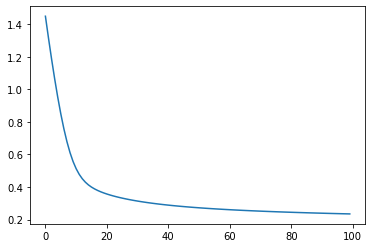

In [113]:
#visualisation de l apprentissage en dans la diminusion de log loss selon les epocs 
#afficher l exactitude de l apprentissage et les parametres retenu du modele
W,b,acscore,history_Loss=learn_perceptron(dataset,Ys)
print('Les parametres W ',W,'et b',b)
print('l exactitude de la prediction est de ',acscore)
plt.plot(history_Loss)
plt.show()
#for i in range (len(history_Loss)):
    

la prediction de falsedata (array([False]), array([0.00417862]))
la prediction de truedata (array([ True]), array([0.99325638]))


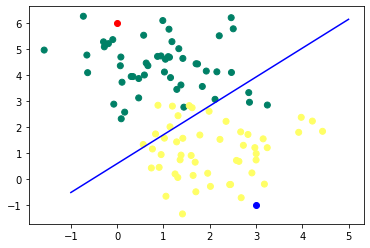

In [114]:
X1=np.linspace(-1,5,100)
X2=(-W[0]*X1 -b)/W[1]
plt.plot(X1,X2,c='b')
falsedata=np.array([0,6])
truedata=np.array([3,-1])
print('la prediction de falsedata',prediction(falsedata,W,b))
print('la prediction de truedata',prediction(truedata,W,b))
plt.scatter(X[:,0],X[:,1],c=Ys,cmap='summer')
plt.scatter(falsedata[0],falsedata[1],c='r')
plt.scatter(truedata[0],truedata[1],c='b')
plt.show()